In [43]:
# chapter 9: plotting and visualization

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

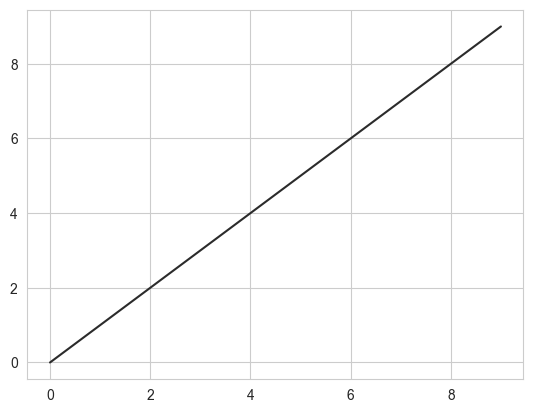

In [46]:
plt.plot(data)
plt.show()

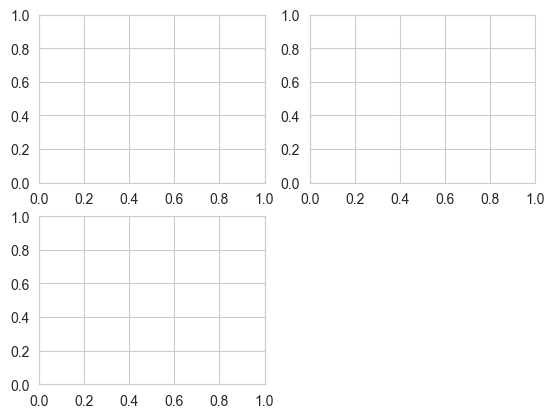

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)


plt.show()

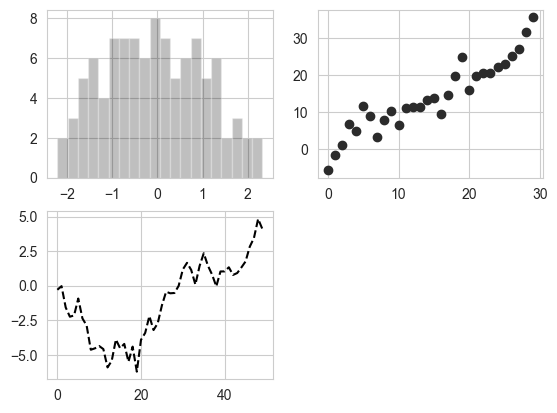

In [48]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.standard_normal(100), bins = 20, color = "black", alpha = 0.25)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(np.random.standard_normal(50).cumsum(), color = "black", linestyle = "dashed")
plt.show()

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

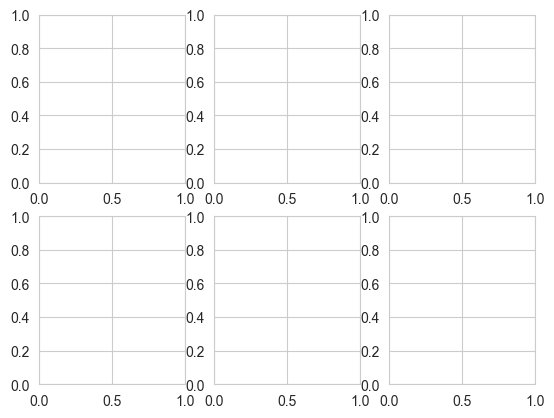

In [49]:
fig, axes = plt.subplots(2, 3)
axes

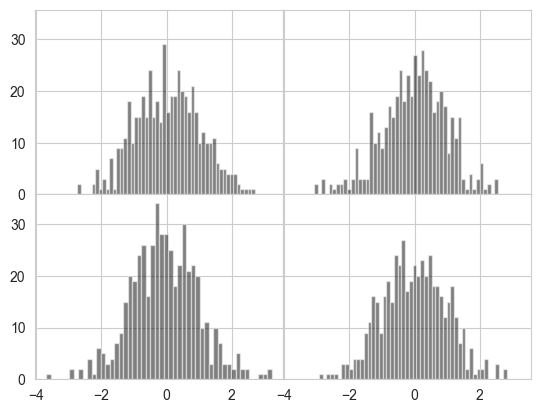

In [50]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins = 50,
                        color = "black", alpha = 0.5)
        
fig.subplots_adjust(wspace = 0, hspace = 0)

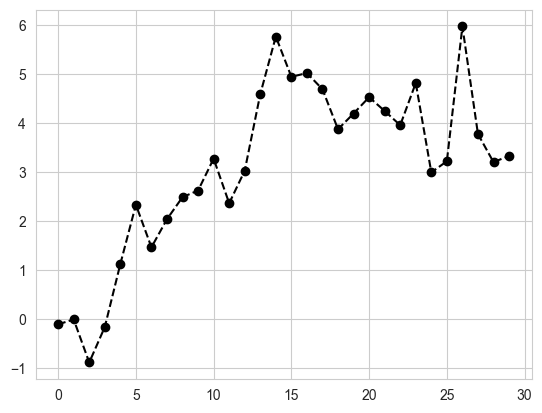

In [51]:
# ax = fig.add_subplot()
plt.plot(np.random.standard_normal(30).cumsum(), color = "black", linestyle = "dashed", marker = "o")
plt.show()

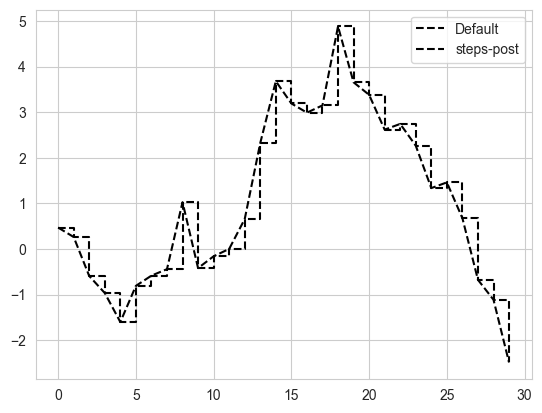

In [52]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()

ax.plot(data, color = "black", linestyle = "dashed", label = "Default")
ax.plot(data, color = "black", linestyle = "dashed", drawstyle = "steps-post", label = "steps-post")
ax.legend()
plt.show()

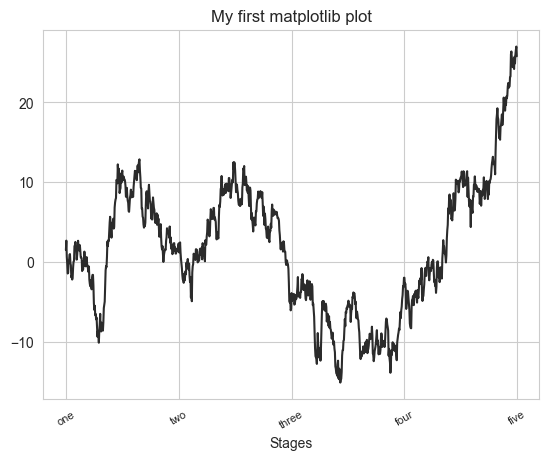

In [53]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation = 30, fontsize = 8)

ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

plt.show()

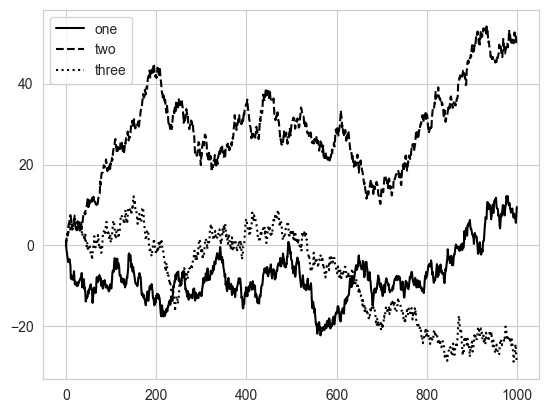

In [54]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color = "black", label = "one")
ax.plot(np.random.randn(1000).cumsum(), color = "black", linestyle = "dashed", label = "two")
ax.plot(np.random.randn(1000).cumsum(), color = "black", linestyle = "dotted", label = "three")
ax.legend()
plt.show()

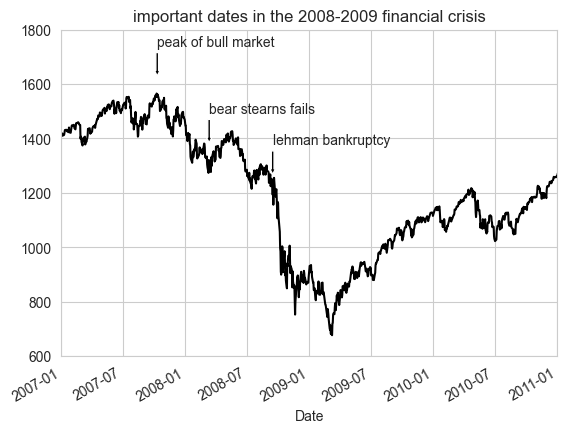

In [55]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/spx.csv",
                   index_col = 0, parse_dates = True)

spx = data["SPX"]

spx.plot(ax = ax, color = "black")

crisis_data = [
    (datetime(2007, 10, 11), "peak of bull market"),
    (datetime(2008, 3, 12), "bear stearns fails"),
    (datetime(2008, 9, 15), "lehman bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy = (date, spx.asof(date) + 75),
                xytext = (date, spx.asof(date) + 225),
                arrowprops = dict(facecolor = "black", headwidth = 4, width = 2, headlength = 4),
                horizontalalignment = "left", verticalalignment = "top")

# zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("important dates in the 2008-2009 financial crisis")

plt.show()

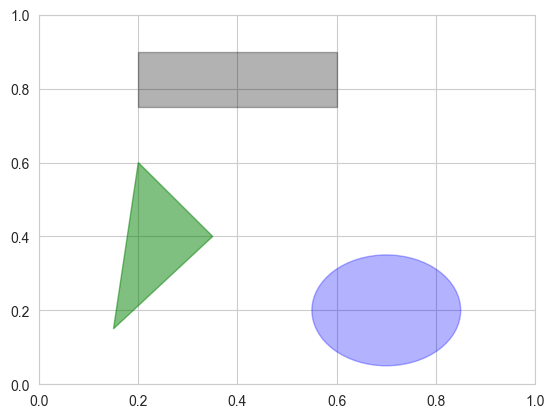

In [56]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color = "black", alpha = 0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color = "blue", alpha = 0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color = "green", alpha = 0.5)

for shape in [rect, circ, pgon]:
    ax.add_patch(shape)

plt.show()

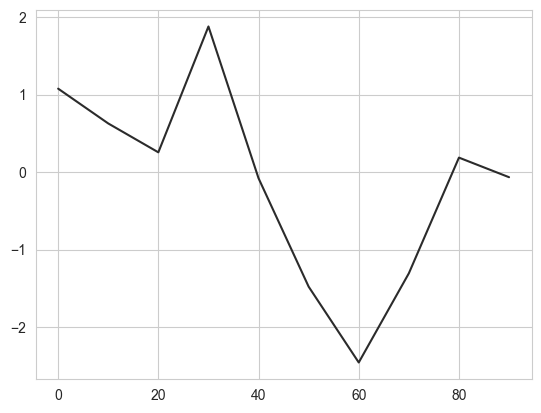

In [57]:
# plotting with pandas and seaborn
s = pd.Series(np.random.standard_normal(10).cumsum(), index = np.arange(0, 100, 10))
s.plot()
plt.show()

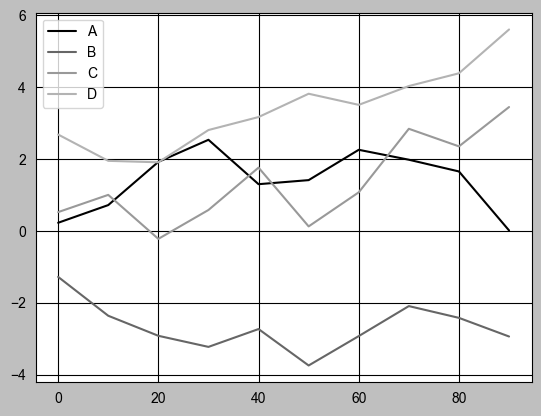

In [58]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns = ["A", "B", "C", "D"],
                  index = np.arange(0, 100, 10))

plt.style.use("grayscale")

df.plot()
plt.show()

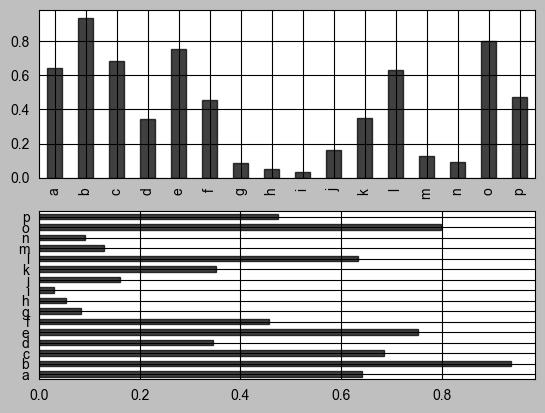

In [59]:
# bar plots
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size = 16), index = list("abcdefghijklmnop"))

data.plot.bar(ax = axes[0], color = "black", alpha = 0.75)
data.plot.barh(ax = axes[1], color = "black", alpha = 0.75)

plt.show()

In [60]:
df = pd.DataFrame(np.random.uniform(size = (6, 4)),
                  index = ["one", "two", "three", "four", "five", "six"],
                  columns = pd.Index(["A", "B", "C", "D"], name = "Genus"))

df

Genus,A,B,C,D
one,0.612045,0.929876,0.371145,0.190247
two,0.329583,0.499980,0.947235,0.273430
three,0.637369,0.084054,0.130232,0.716274
four,0.731987,0.756906,0.862961,0.070260
five,0.923829,0.943653,0.832601,0.596307
six,0.166258,0.644869,0.370049,0.252403


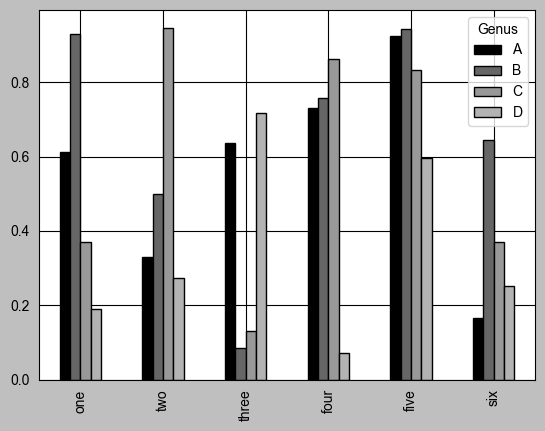

In [61]:
df.plot.bar()
plt.show()

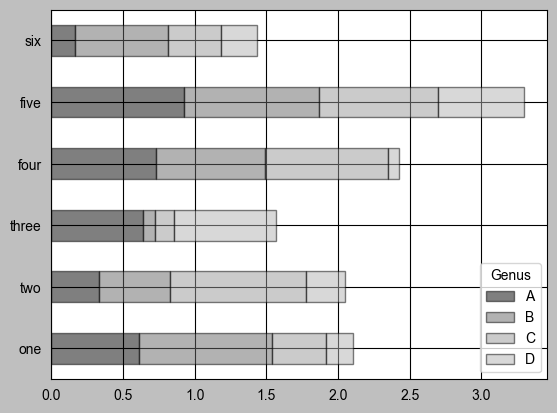

In [62]:
df.plot.barh(stacked = True, alpha = 0.5)
plt.show()

In [63]:
tips = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [64]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index = ["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [65]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(axis = "columns"), axis = "index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


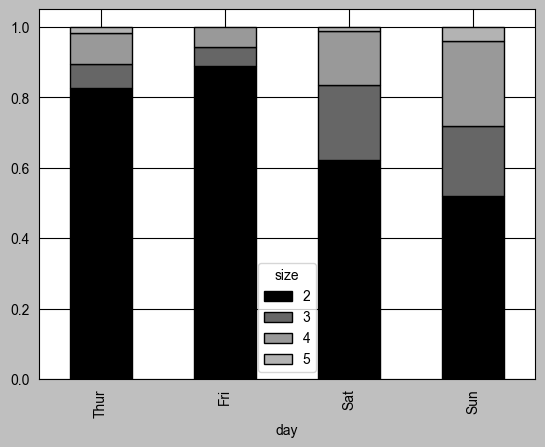

In [66]:
party_pcts.plot.bar(stacked = True)
plt.show()

In [67]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


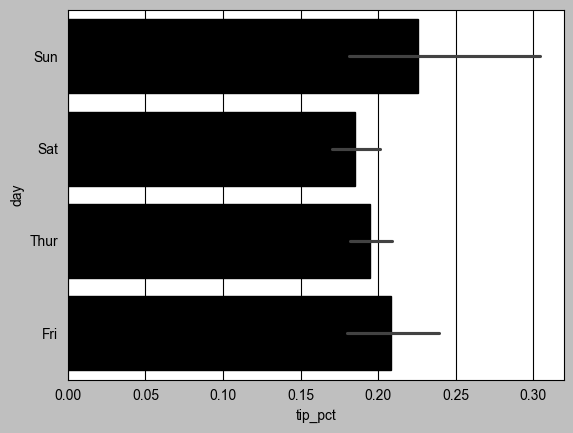

In [68]:
sns.barplot(x = "tip_pct", y = "day", data = tips, orient = "h")
plt.show()

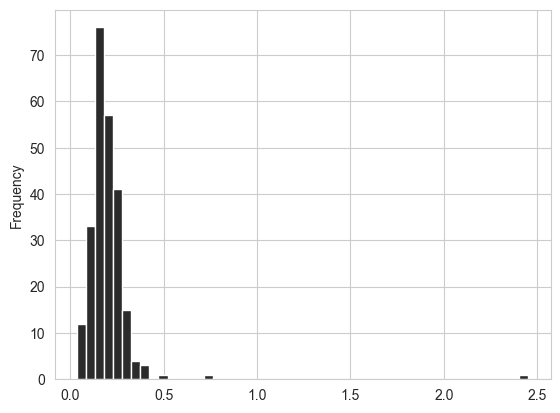

In [69]:
sns.set_style("whitegrid")
sns.set_palette("Greys_r")

tips["tip_pct"].plot.hist(bins = 50)
plt.show()

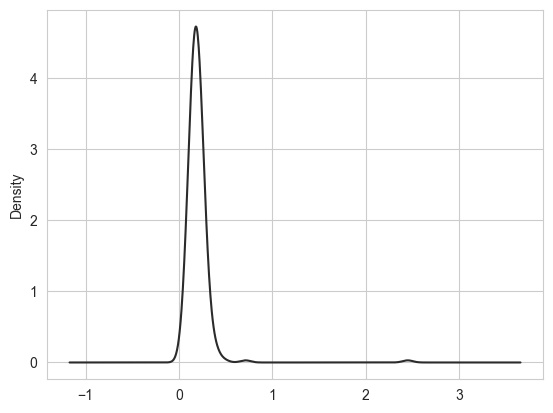

In [70]:
tips["tip_pct"].plot.density()
plt.show()

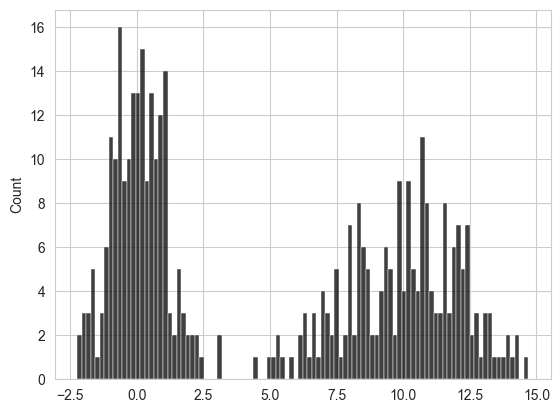

In [71]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins = 100, color = "black")
plt.show()

In [72]:
# scatter or point plots
macro = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()

trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


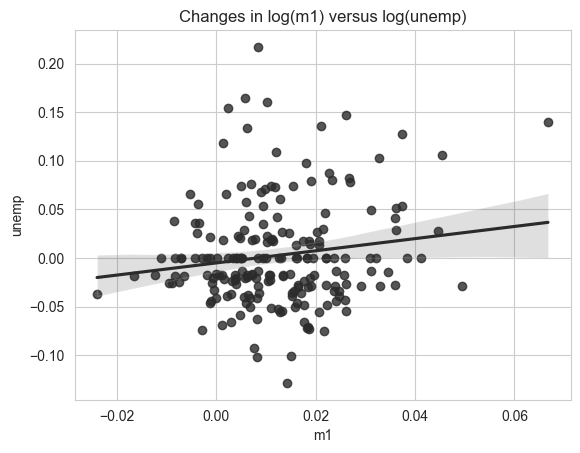

In [73]:
ax = sns.regplot(x = "m1", y = "unemp", data = trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")
plt.show()

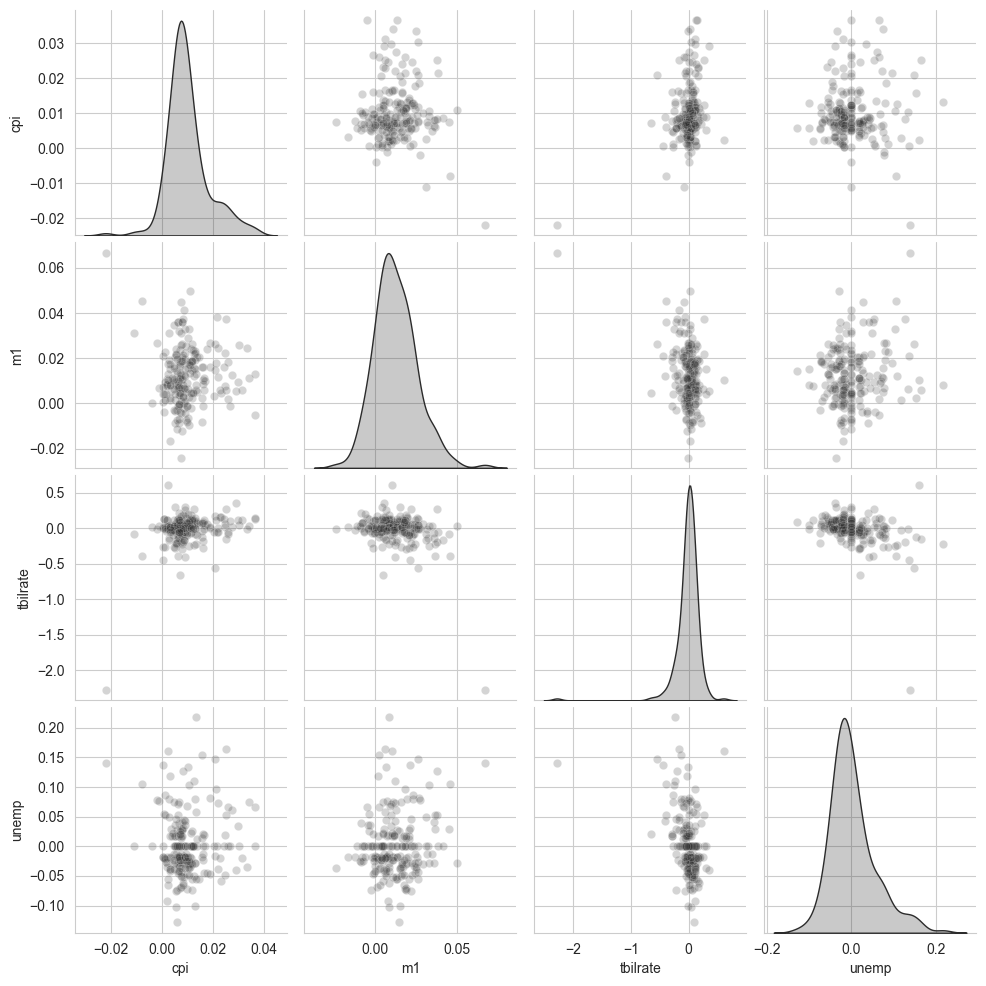

In [74]:
sns.pairplot(trans_data, diag_kind = "kde", plot_kws = {"alpha": 0.2})
plt.show()

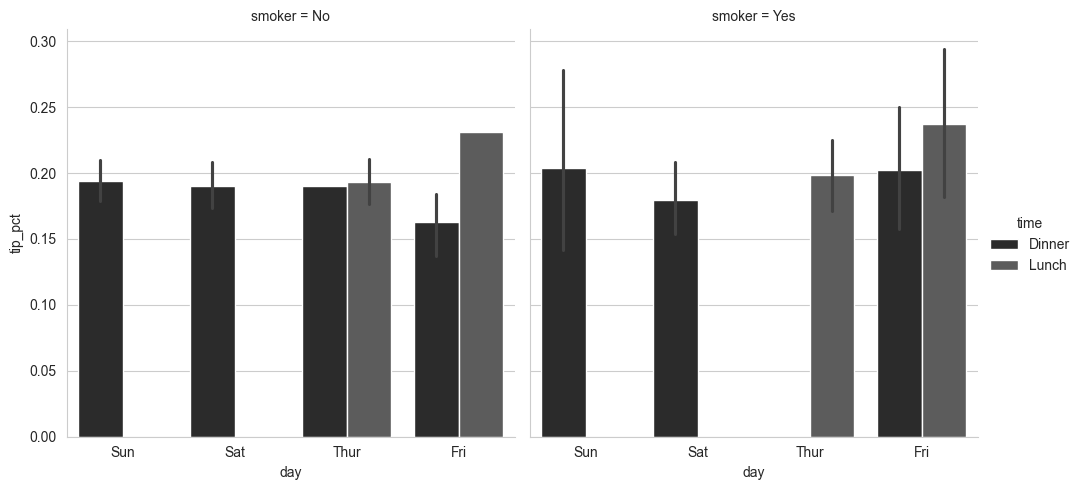

In [75]:
sns.catplot(x = "day", y = "tip_pct", hue = "time", col = "smoker", kind = "bar",
            data = tips[tips.tip_pct < 1])

plt.show()

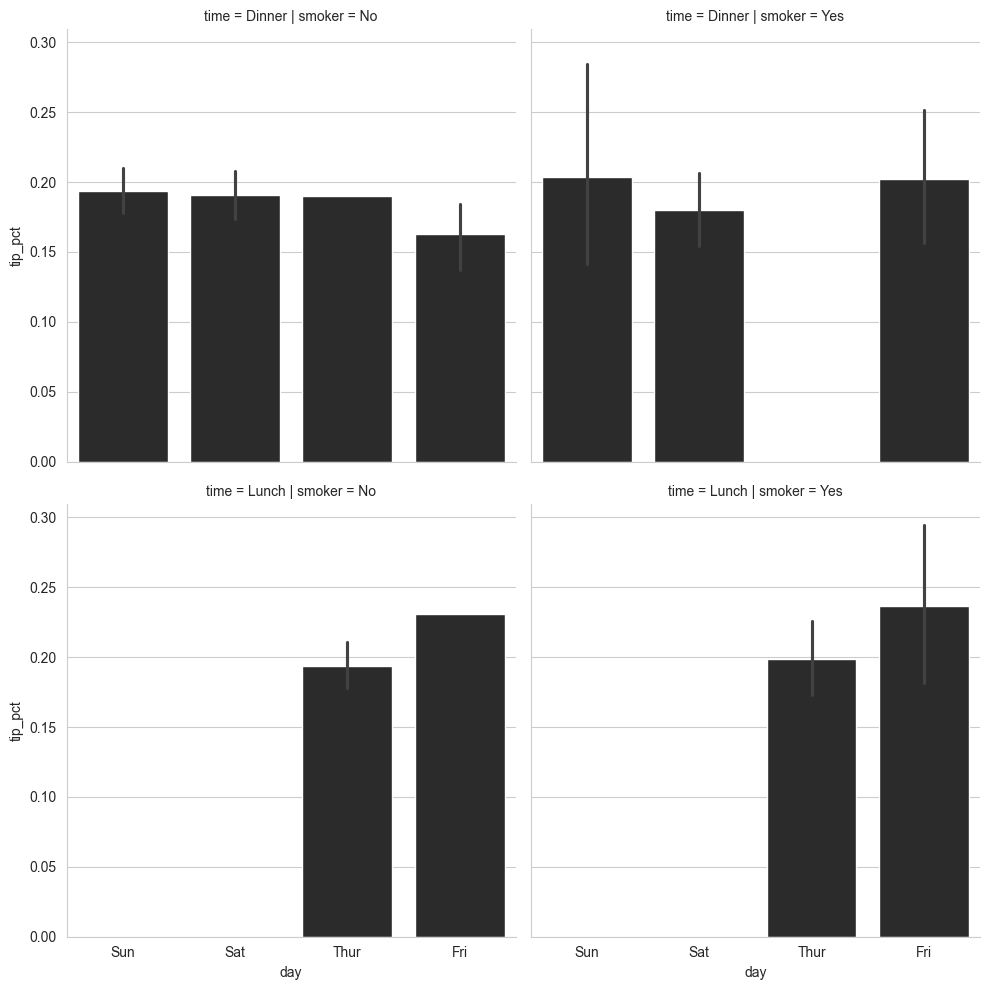

In [76]:
sns.catplot(x = "day", y = "tip_pct", row = "time",
            col = "smoker", kind = "bar",
            data = tips[tips.tip_pct < 1])

plt.show()